# CPR appropriation

## Pre-requisites

In [64]:
%%capture
!pip install src/gym_cpr_grid
!pip install -r requirements.txt

In [1]:
import numpy as np
import gym

%load_ext autoreload
%autoreload 2

## Random policy

In [3]:
env = gym.make('gym_cpr_grid:CPRGridEnv-v0', n_agents=3, grid_width=5, grid_height=7)

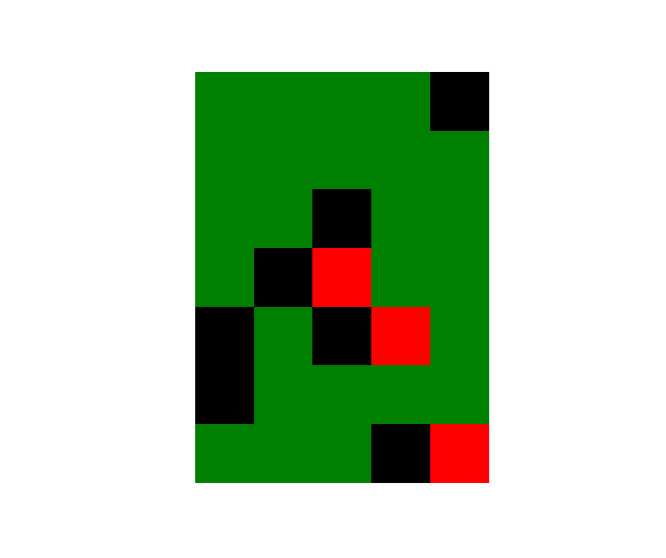

In [41]:
import matplotlib.pyplot as plt
from IPython import display

fig, ax, img = env.plot(env.render('rgb_array'))
for _ in range(env.max_steps):
    env.step([env.action_space.sample() for _ in range(env.n_agents)])
    display.clear_output(wait=True)
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
env.close()

## RLlib baselines

In [4]:
from src import models
from ray.rllib.models import ModelCatalog

ModelCatalog.register_custom_model("fcn", models.FCNetwork)

In [5]:
from ray import tune
from ray.rllib.agents.dqn import DQNTrainer
from ray.rllib.models.torch.fcnet import FullyConnectedNetwork

tune.run(
    DQNTrainer, 
    config={
        "env": "gym_cpr_grid:CPRGridEnv-v0", 
        "env_config": {
            "n_agents": 3,
            "grid_width": 10,
            "grid_height": 7
        }, 
        "num_workers": 1, 
        "framework": "torch",
        "model": {
            "custom_model": "fcn"
        }
    }
)

2021-08-16 22:59:54,581	INFO services.py:1245 -- View the Ray dashboard at http://127.0.0.1:8265


Trial name,status,loc
DQN_gym_cpr_grid:CPRGridEnv-v0_e8c3e_00000,PENDING,


(pid=49892) 2021-08-16 22:59:57,120	INFO trainer.py:718 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=49892) 2021-08-16 22:59:58,684	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 22:59:58,695	ERROR trial_runner.py:773 -- Trial DQN_gym_cpr_grid:CPRGridEnv-v0_e8c3e_00000: Error processing event.
Traceback (most recent call last):
  File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/ray/tune/trial_runner.py", line 739, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/ray/tune/ray_trial_executor.py", line 729, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/ray/_private/client_mode_hook.py", line 82, in wrapper
    return func(*args, **kwargs)
  File "/U

Result for DQN_gym_cpr_grid:CPRGridEnv-v0_e8c3e_00000:
  {}
  


Trial name,status,loc
DQN_gym_cpr_grid:CPRGridEnv-v0_e8c3e_00000,ERROR,
Trial name,# failures,error file
DQN_gym_cpr_grid:CPRGridEnv-v0_e8c3e_00000,1,/Users/jobs/ray_results/DQN_2021-08-16_22-59-55/DQN_gym_cpr_grid:CPRGridEnv-v0_e8c3e_00000_0_2021-08-16_22-59-55/error.txt


TuneError: ('Trials did not complete', [DQN_gym_cpr_grid:CPRGridEnv-v0_e8c3e_00000])